In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

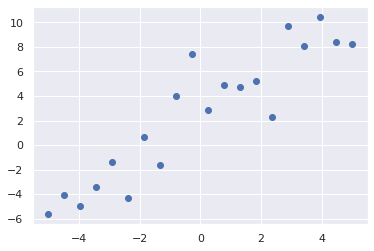

In [44]:
num = 20
t = np.linspace(-5, 5, num)
y = 1.5 * t + 3 + np.random.normal(0, 2, num)

plt.scatter(t, y)

In [0]:
X = t.reshape(-1, 1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=1)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

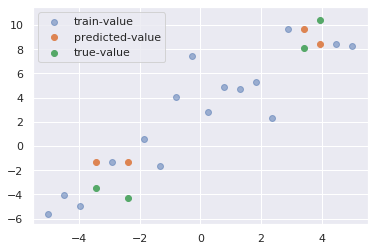

In [48]:
y_pred = knn_reg.predict(X_test)

plt.scatter(X_train, y_train, alpha=0.5, label='train-value')
plt.scatter(X_test, y_pred, label='predicted-value')
plt.scatter(X_test, y_test, label='true-value')
plt.legend()

root mean square error for 1 neighbor:

train-set: 0.0
test-set: 1.6542165514178697
root mean square error for 3 neighbor:

train-set: 1.792532457926411
test-set: 1.448204034747098
root mean square error for 9 neighbor:

train-set: 2.1242412922049483
test-set: 1.4119479935667185


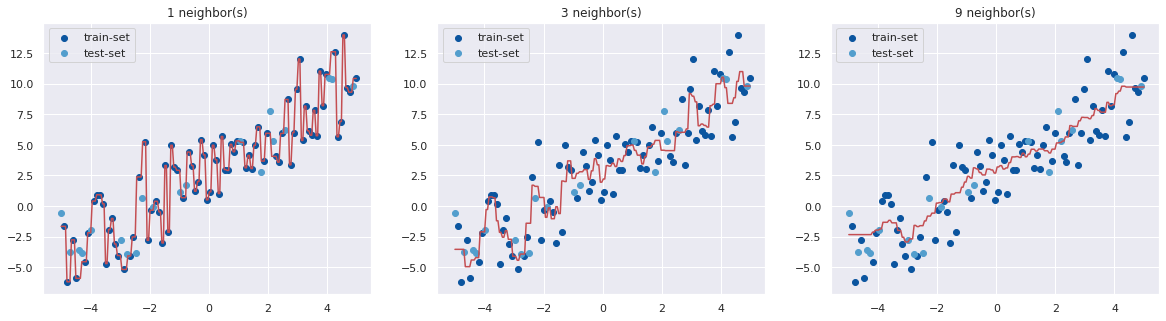

In [89]:
from sklearn.metrics import mean_squared_error

color_palette = sns.color_palette("Blues")

num = 100
t = np.linspace(-5, 5, num)
y = 1.5 * t + 3 + np.random.normal(0, 2, num)
X = t.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

neighbors = [1, 3, 9]
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

for i, n in enumerate(neighbors):
    knn_reg = KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_train, y_train)
    lin_ = np.linspace(-5, 5, num*2).reshape(-1, 1)
    y_pred = knn_reg.predict(lin_)
    axes[i].scatter(X_train, y_train, color=color_palette[-1], label='train-set')
    axes[i].scatter(X_test, y_test, color=color_palette[-3], label='test-set')
    axes[i].legend()

    axes[i].plot(lin_, y_pred, 'r')
    axes[i].set_title(f'{n} neighbor(s)')
    
    y_pred_train = knn_reg.predict(X_train)
    y_pred_test = knn_reg.predict(X_test)

    print('====================================')
    print(f'root mean square error for {n} neighbor:')
    print()
    print(f'train-set: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
    print(f'test-set: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')